# Mathematics of Neural Networks

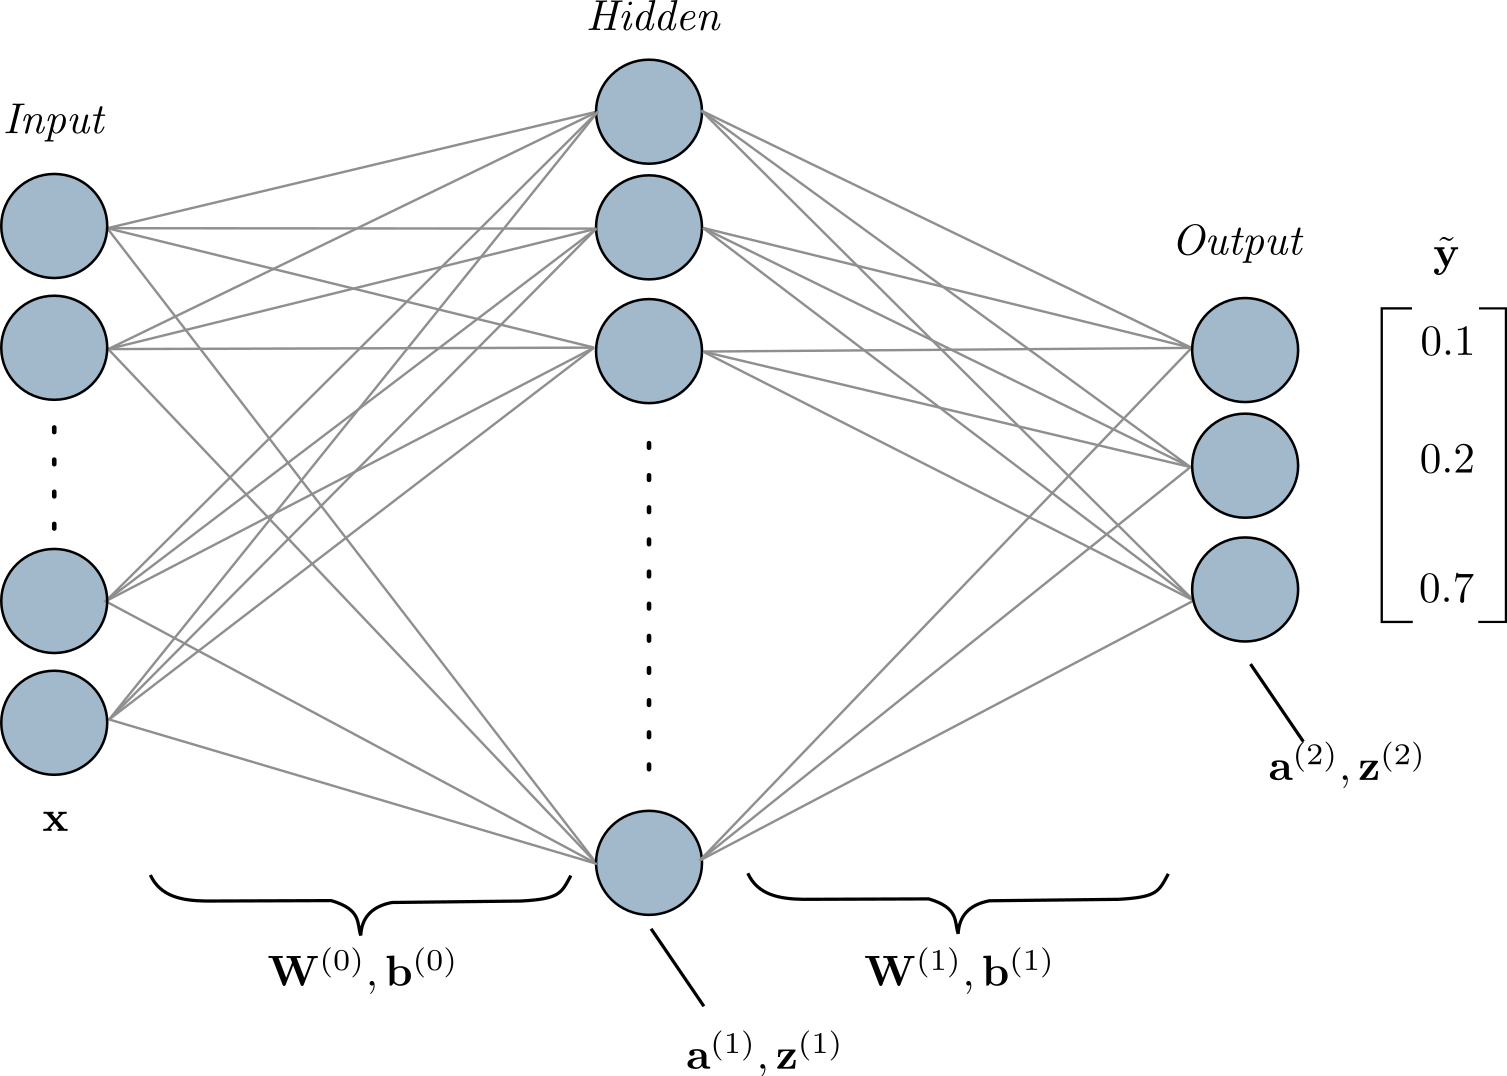

In [1]:
from IPython.display import Image
Image("nn.png")

Let us consider a simple neural network with one hidden layers. We denote the input as $\textbf{x}\in\mathbb{R}^2$ and the output as $\widetilde{y}\in\mathbb{R}$. Additinally, we call the pre-activation of a layer $\textbf{z}^l$ and the activated result $\textbf{a}^l$. The input is denoted as the $0$-th layer without an activation and therefore

$$\textbf{a}^0 = \textbf{z}^0 = \textbf{x}$$

In the next step we compute the output of the first layer, i.e. $\textbf{z}^1,\textbf{a}^1\in\mathbb{R}^{N_H}$, where $N_H$ is the number of hidden neurons. This can be done for all nodes simultaneously by using the matrix multiplication

$$\textbf{z}^1 = \textbf{W}^0 \textbf{a}^0 + \textbf{b}^0,$$

where $\textbf{W}^0$ and $\textbf{b}^0$ are the (learnable) parameters of the first layer. The parameters $\textbf{W}^0$ are usually called the *weights* of a layer and the parameters $\textbf{b}^0$ are called the *bias* of the layer. Let us write down the explicit matrix multiplication for our concrete example

$$
\begin{pmatrix}
z^1_1 \\
z^1_2 \\
z^1_3 \\
z^1_4 \\
\end{pmatrix}
= 
\begin{pmatrix}
w^0_{11} & w^0_{12} \\
w^0_{21} & w^0_{22} \\
w^0_{31} & w^0_{32} \\
w^0_{41} & w^0_{42} \\
\end{pmatrix}
\begin{pmatrix}
a^0_1 \\
a^0_2 \\
\end{pmatrix}
+
\begin{pmatrix}
b^0_1 \\
b^0_2 \\
b^0_3 \\ 
b^0_4 \\
\end{pmatrix}
$$


In the next step we apply the nonlinear function $h:\mathbb{R}^{N_H}\to\mathbb{R}^{N_H}$ to each element of $\textbf{z}^1$ in order to compute the activated output of the neurons. The nonlinearity is also often called *activation function*. Commonly used activation functions are *ReLU, tanh, sigmoid*, and *softplus*. We will use the sigmoid function here. The sigmoid function is defined as

$$\textbf{a}=h(\textbf{z}) \quad \iff \quad a_i=\sigma(z_i)=\frac{1}{1 + \exp(-z_i)}.$$

Hence, the sigmoid function maps all values $x$ to the range $[0,1]$ as shown in the following plot.

<IPython.core.display.Javascript object>


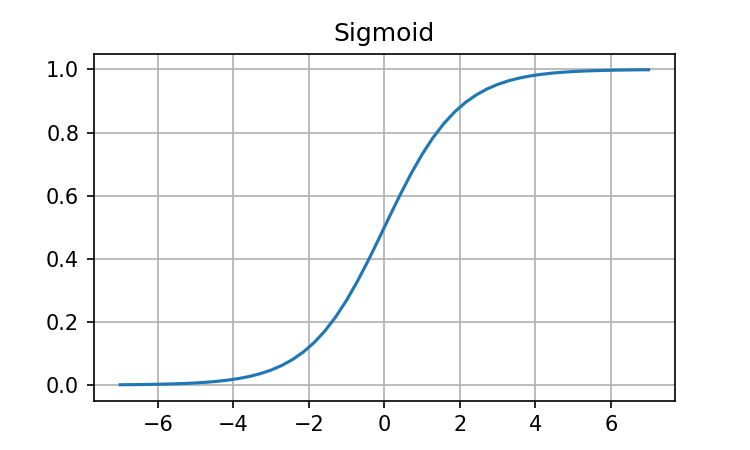

Text(0.5, 1.0, 'Sigmoid')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
x = np.linspace(-7, 7)
sigmoid = 1.0 / (1.0 + np.exp(-x))
plt.figure(figsize=(5,3))
plt.plot(x, sigmoid)
plt.grid(True)
plt.title('Sigmoid')

Using the activation function we can compute the activated output of the first layer as

$$\textbf{a}^1 = h(\textbf{z}^1)$$

The steps to compute the output of the first layer can be summarized to:

$$\textbf{z}^1 = \textbf{W}^0 \textbf{a}^0 + \textbf{b}^0$$

$$\textbf{a}^1 = h(\textbf{z}^1)$$

The second layer maps the $N_H$ hidden neurons to our desired output dimension. We can compute the output of the second layer, i.e. the output layer in our case, using

$$z^2 = \textbf{W}^1 \textbf{a}^1 + b^1,$$

where again $\textbf{W}^1$ and $b^1$ are the parameters of the second layer. Writing down the matrix multiplication explicitly we obtain

$$
z^2
= 
\begin{pmatrix}
w^1_{11} & w^1_{12} & w^1_{13} & w^1_{14} \\
\end{pmatrix}
\begin{pmatrix}
a^1_1 \\
a^1_2 \\
a^1_3 \\
a^1_4 \\
\end{pmatrix}
+
b^1
$$

Since this network is designed for binary classification, we also use the sigmoid activation function for the output layer.
Thus, the activated result is given by:

$$a^2 = g(z^2) \quad \text{with} \quad g(z) = \sigma(z)$$

Then, the output of the network is the activated output of the last layer, so

$$\widetilde{y} = a^2.$$

Summing up the computations to get the ouput of the second layer yields

$$z^2 = \textbf{W}^1 \textbf{a}^1 + b^1$$
$$a^2 = g(z^2)$$

where we can see that the structure is very similar to the computations of the first layer. In fact, using this notation, we can generalize this to an arbitrary number of layers, i.e.

$$\textbf{z}^{l+1} = \textbf{W}^l \textbf{a}^l + \textbf{b}^l$$
$$\textbf{a}^l = h(\textbf{z}^l)$$

We can write down the the full forward function as

$$\widetilde{y} = g(\underbrace{\textbf{W}^1\underbrace{h(\overbrace{\textbf{W}^0\textbf{a}^0 + \textbf{b}^0}^{\textbf{z}^1})}_{\textbf{a}^1} + b^{(1)}}_{z^2})$$

## Backward

First we need to define a loss function. A typical loss function for binary classification is the binary cross entropy:

$$\mathcal{L}=-\Big(y \ln(\widetilde{y}) + (1-y) \ln(1-\widetilde{y})\Big)$$

We are interested in the derivative w.r.t. to the model parameters $\{\textbf{W}^0, \textbf{W}^1, \textbf{b}^0, b^1\}$. Now we start from the back of the network and move towards the input. First, we compute the derivative of the loss function w.r.t. to the parameters $\textbf{W}^1$ using the chain rule:

$$\frac{\partial \mathcal{L}}{\partial \textbf{W}^1} = \frac{\partial z^2}{\partial \textbf{W}^1} \underbrace{\frac{\partial \widetilde{y}}{\partial z^2}
\frac{\partial \mathcal{L}}{\partial \widetilde{y}}}_{e^2}$$

Here, we use the short hand notation $e^2$ for the gradient of the Loss function w.r.t. to the pre-activation of the second layer $e^2=\frac{\partial \mathcal{L}}{\partial z^2}$. Next we compute the individual terms.

$$\frac{\partial \mathcal{L}}{\partial \widetilde{y}} = -\frac{y}{\widetilde{y}}+\frac{1-y}{1-\widetilde{y}}$$ 

$$\frac{\partial \widetilde{y}}{\partial z^2} = \frac{\partial g}{\partial z^2}=g'(z^2)=\sigma'(z^2)$$

$$\frac{\partial z^2}{\partial \textbf{W}^1} = (\textbf{a}^1)^\top$$

The derivative w.r.t. $\textbf{W}^1$ is given by

$$\frac{\partial \mathcal{L}}{\partial \textbf{W}^1} = (\textbf{a}^1)^T e^2$$
with
$$e^2 = \sigma'(z^2) \left(-\frac{y}{\widetilde{y}}+\frac{1-y}{1-\widetilde{y}}\right).$$

Next we compute the derivative w.r.t. $b^1$ 

$$\frac{\partial \mathcal{L}}{\partial b^1} = \frac{\partial z^2}{\partial b^1} \underbrace{\frac{\partial \widetilde{y}}{\partial z^2}
\frac{\partial \mathcal{L}}{\partial \widetilde{y}}}_{e^2}$$

By looking at the chain rule, we see, that we can reuse $e^2$. The only missing term is

$$\frac{\partial z^2}{\partial b^1} = 1$$

Hence the complete derivative is given by

$$\frac{\partial \mathcal{L}}{\partial b^1} = e^2$$